In [1]:
dataRaw = '../rawData'
label = ['Good', 'PotentiallyUseful', 'Bad']

from xml.etree import ElementTree as ET
import os
import pickle as pkl

In [2]:
with open('../data/dataset.pkl', 'rb') as fr:
    dataset = pkl.load(fr)

# samples num

In [3]:
train15_num = len(dataset['15train.xml'])
dev15_num = len(dataset['15dev.xml'])
test15_num = len(dataset['15test.xml'])

train17_num = len(dataset['16train1.xml'])+len(dataset['16train2.xml'])+ train15_num + dev15_num + test15_num + len(dataset['16dev.xml'])
dev17_num = len(dataset['16test.xml'])
test17_num = len(dataset['17test.xml'])

print('the number of samples in SemEval2015:', train15_num, dev15_num, test15_num)
print('the number of samples in SemEval2017:', train17_num, dev17_num, test17_num)

the number of samples in SemEval2015: 16541 1645 1976
the number of samples in SemEval2017: 39962 3150 2930


# questions number

In [4]:
train15set = set()
dev15set = set()
test15set = set()

train17set = set()
dev17set = set()
test17set = set()

[train15set.add(e[0].split('_')[0]) for e in dataset['15train.xml']]
[dev15set.add(e[0].split('_')[0]) for e in dataset['15dev.xml']]
[test15set.add(e[0].split('_')[0]) for e in dataset['15test.xml']]

[train17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17set.update(train15set)
train17set.update(dev15set)
train17set.update(test15set)
[dev17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16test.xml']]
[test17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['17test.xml']]

print('the number of questions in SemEval2015:', len(train15set), len(dev15set), len(test15set))
print('the number of questions in SemEval2017:', len(train17set), len(dev17set), len(test17set))


the number of questions in SemEval2015: 2600 300 329
the number of questions in SemEval2017: 5209 315 293


# sentence length

In [5]:
train15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15train.xml']]
dev15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15dev.xml']]
test15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15test.xml']]

train17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17_qa_length += train15_qa_length + dev15_qa_length + test15_qa_length
dev17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16test.xml']]
test17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['17test.xml']]

In [6]:
train15_qa_length = [a for a in zip(*train15_qa_length)]
dev15_qa_length = [a for a in zip(*dev15_qa_length)]
test15_qa_length = [a for a in zip(*test15_qa_length)]

train17_qa_length = [a for a in zip(*train17_qa_length)]
dev17_qa_length = [a for a in zip(*dev17_qa_length)]
test17_qa_length = [a for a in zip(*test17_qa_length)]

In [7]:
length15 = [train15_qa_length, dev15_qa_length, test15_qa_length]
length17 = [train17_qa_length, dev17_qa_length, test17_qa_length]

print('max length of subject in 15:', [max(length15[i][0]) for i in range(3)])
print('max length of body in 15:', [max(length15[i][1]) for i in range(3)])
print('max length of answer in 15:', [max(length15[i][2]) for i in range(3)])

print('max length of subject in 17:', [max(length17[i][0]) for i in range(3)])
print('max length of body in 17:', [max(length17[i][1]) for i in range(3)])
print('max length of answer in 17:', [max(length17[i][2]) for i in range(3)])

max length of subject in 15: [27, 23, 27]
max length of body in 15: [108, 104, 105]
max length of answer in 15: [1622, 1350, 678]
max length of subject in 17: [27, 22, 22]
max length of body in 17: [122, 113, 124]
max length of answer in 17: [1622, 238, 417]


In [8]:
print('min length of subject in 15:', [min(length15[i][0]) for i in range(3)])
print('min length of body in 15:', [min(length15[i][1]) for i in range(3)])
print('min length of answer in 15:', [min(length15[i][2]) for i in range(3)])

print('min length of subject in 17:', [min(length17[i][0]) for i in range(3)])
print('min length of body in 17:', [min(length17[i][1]) for i in range(3)])
print('min length of answer in 17:', [min(length17[i][2]) for i in range(3)])

min length of subject in 15: [1, 1, 1]
min length of body in 15: [1, 4, 1]
min length of answer in 15: [1, 1, 1]
min length of subject in 17: [1, 1, 1]
min length of body in 17: [1, 4, 4]
min length of answer in 17: [1, 1, 1]


In [9]:
print('average length of subject in 15:', [sum(length15[i][0])/len(length15[i][0]) for i in range(3)])
print('average length of body in 15:', [sum(length15[i][1])/len(length15[i][1]) for i in range(3)])
print('average length of answer in 15:', [sum(length15[i][2])/len(length15[i][2]) for i in range(3)])

print('average length of subject in 17:', [sum(length17[i][0])/len(length17[i][0]) for i in range(3)])
print('average length of body in 17:', [sum(length17[i][1])/len(length17[i][1]) for i in range(3)])
print('average length of answer in 17:', [sum(length17[i][2])/len(length17[i][2]) for i in range(3)])

average length of subject in 15: [6.190073151562784, 5.697872340425532, 5.8917004048583]
average length of body in 15: [41.09872438183907, 41.58480243161094, 39.392712550607285]
average length of answer in 15: [35.82310622090563, 34.21337386018237, 36.010627530364374]
average length of subject in 17: [6.165231970371853, 5.866666666666666, 5.8668941979522184]
average length of body in 17: [46.08855913117461, 49.67619047619048, 54.56655290102389]
average length of answer in 17: [38.227315950152644, 38.13301587301587, 40.1518771331058]


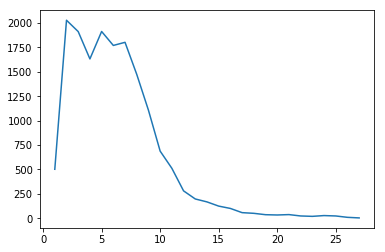

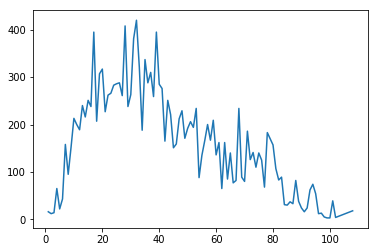

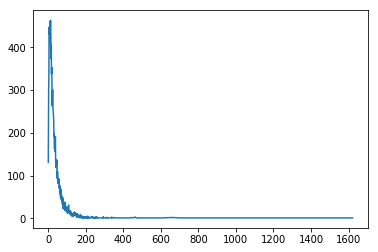

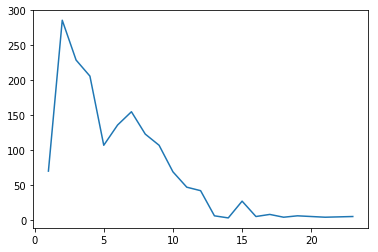

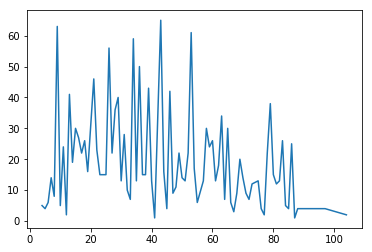

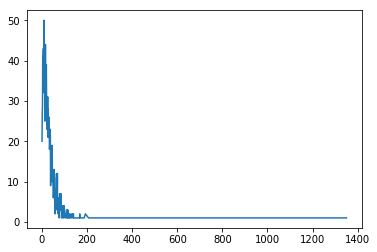

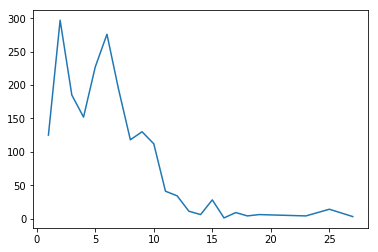

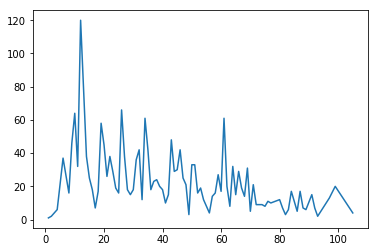

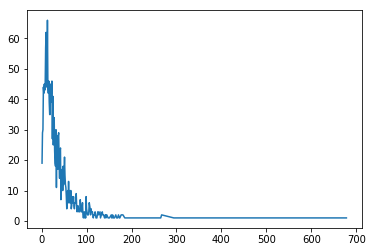

In [11]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

count15 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length15] 
count17 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length17]
num = 1
for data in count15:
    for sentence in data:
        plt.figure(num)
        plt.plot(*zip(*sentence))
        plt.show()
        


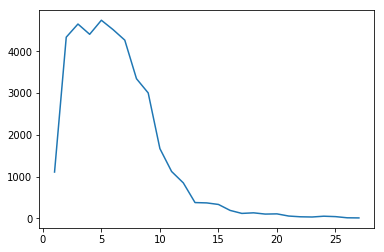

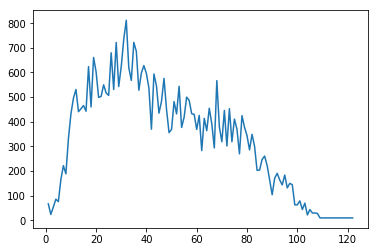

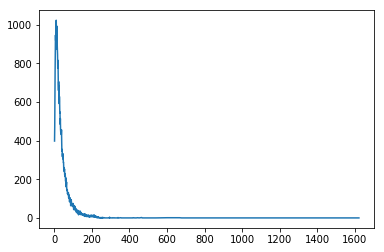

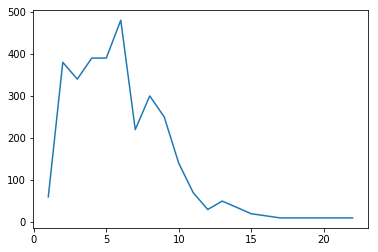

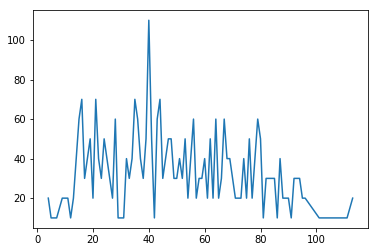

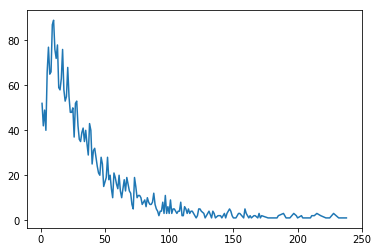

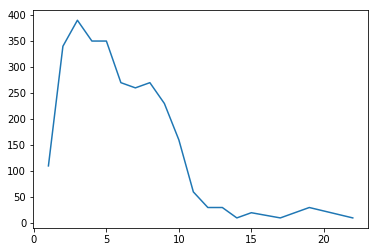

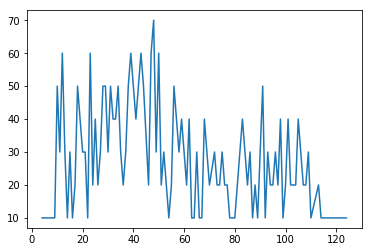

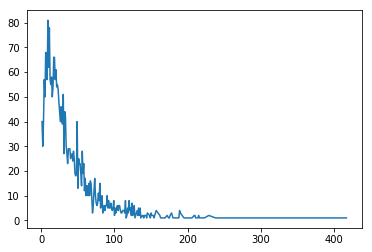

In [12]:
for data in count17:
    for sentence in data:
        plt.figure()
        plt.plot(*zip(*sentence))
        plt.show()

In [21]:
def search(sentence):
    all_num = 0
    for item in sentence:
        all_num += item[1]
    print(all_num)
    cur_num = 0
    least_num = 0.9*all_num
    start_rate = 0.9
    for item in sentence:
        cur_num += item[1]
        if cur_num > least_num:
            print('current rate: {}, current length: {}, num: {}, cur_num: {}'.format(cur_num / all_num, item[0], item[1], cur_num))
            start_rate += 0.01
            least_num = start_rate * all_num
    
    print('\n\n')
        

        

In [22]:
for data in count15:
    for sentence in data:
        search(sentence)

16541
current rate: 0.9273925397497128, current length: 11, num: 512, cur_num: 15340
current rate: 0.9443806299498216, current length: 12, num: 281, cur_num: 15621
current rate: 0.9563508856780122, current length: 13, num: 198, cur_num: 15819
current rate: 0.9665074662958709, current length: 14, num: 168, cur_num: 15987
current rate: 0.9740644459222538, current length: 15, num: 125, cur_num: 16112
current rate: 0.9801704854603712, current length: 16, num: 101, cur_num: 16213
current rate: 0.9836769240070129, current length: 17, num: 58, cur_num: 16271
current rate: 0.9867601716945771, current length: 18, num: 51, cur_num: 16322
current rate: 0.9889970376639865, current length: 19, num: 37, cur_num: 16359
current rate: 0.9910525361223627, current length: 20, num: 34, cur_num: 16393



16541
current rate: 0.9042379541744755, current length: 75, num: 140, cur_num: 14957
current rate: 0.9117949338008585, current length: 76, num: 125, cur_num: 15082
current rate: 0.9269693488906354, current

In [23]:
for data in count17:
    for sentence in data:
        search(sentence)

39962
current rate: 0.902632500875832, current length: 10, num: 1669, cur_num: 36071
current rate: 0.9306591261698614, current length: 11, num: 1120, cur_num: 37191
current rate: 0.9518542615484711, current length: 12, num: 847, cur_num: 38038
current rate: 0.9612381762674541, current length: 13, num: 375, cur_num: 38413
current rate: 0.9704219008057655, current length: 14, num: 367, cur_num: 38780
current rate: 0.9786797457584705, current length: 15, num: 330, cur_num: 39110
current rate: 0.98335919123167, current length: 16, num: 187, cur_num: 39297
current rate: 0.9862369250788249, current length: 17, num: 115, cur_num: 39412
current rate: 0.9894649917421551, current length: 18, num: 129, cur_num: 39541
current rate: 0.9919423452279665, current length: 19, num: 99, cur_num: 39640



39962
current rate: 0.9029077623742555, current length: 81, num: 286, cur_num: 36082
current rate: 0.9116410590060557, current length: 82, num: 349, cur_num: 36431
current rate: 0.924253040388369, curren